<a href="https://colab.research.google.com/github/sarayumummidi/MusicEEGAnalysis/blob/main/Music_EEG_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://stacks.stanford.edu/file/druid:sd922db3535/S1_1_raw.mat

--2025-04-06 17:12:49--  https://stacks.stanford.edu/file/druid:sd922db3535/S1_1_raw.mat
Resolving stacks.stanford.edu (stacks.stanford.edu)... 171.67.37.91
Connecting to stacks.stanford.edu (stacks.stanford.edu)|171.67.37.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92247325 (88M) [application/octet-stream]
Saving to: ‘S1_1_raw.mat’

S1_1_raw.mat        100%[===================>]  87.97M  9.25MB/s    in 9.9s    

2025-04-06 17:12:59 (8.89 MB/s) - ‘S1_1_raw.mat’ saved [92247325/92247325]



In [ ]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 26.0 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import mne
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load a raw EEG .mat file
raw_data = loadmat('S1_1_raw.mat') #dictionary, not a list.

# Access the EEG data (assuming variable 'X' contains electrode-by-time data)
eeg_data = raw_data['X']

DIN_1 = raw_data['DIN_1']  # Extract DIN_1 triggers and onsets

# Access the sampling frequency
fs = raw_data['fs'][0][0]  # Sampling rate (should be 125 Hz)


In [ ]:
len(raw_data['X'][0])


157177

In [ ]:
len(raw_data['X'][0])


157177

In [ ]:
raw_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Jul 18 16:53:31 2019',
 '__version__': '1.0',
 '__globals__': [],
 'DIN_1': array([[array(['D126'], dtype='<U4'), array(['DI10'], dtype='<U4'),
         array(['DI32'], dtype='<U4'), array(['D128'], dtype='<U4'),
         array(['D128'], dtype='<U4'), array(['D128'], dtype='<U4'),
         array(['D128'], dtype='<U4'), array(['D128'], dtype='<U4'),
         array(['DI11'], dtype='<U4'), array(['DIN6'], dtype='<U4'),
         array(['DIN5'], dtype='<U4'), array(['DIN8'], dtype='<U4'),
         array(['DIN6'], dtype='<U4'), array(['DI10'], dtype='<U4'),
         array(['DI35'], dtype='<U4'), array(['D128'], dtype='<U4'),
         array(['D128'], dtype='<U4'), array(['D128'], dtype='<U4'),
         array(['D128'], dtype='<U4'), array(['D128'], dtype='<U4'),
         array(['DI11'], dtype='<U4'), array(['DIN7'], dtype='<U4'),
         array(['DIN8'], dtype='<U4'), array(['DIN2'], dtype='<U4'),
         array(['DIN7'], 

In [ ]:
raw_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'DIN_1', 'X', 'fs'])



125Hz, you sample 157177 times- what time duration are you sampling for?  ~21mins

[[ 2108     0     1]
 [ 2627     0     3]
 [ 2754     0     7]
 [ 2889     0     2]
 [10388     0     2]]
Trigger Map: {np.str_('D126'): 1, np.str_('D128'): 2, np.str_('DI10'): 3, np.str_('DI11'): 4, np.str_('DI21'): 5, np.str_('DI26'): 6, np.str_('DI32'): 7, np.str_('DI35'): 8, np.str_('DIN2'): 9, np.str_('DIN5'): 10, np.str_('DIN6'): 11, np.str_('DIN7'): 12, np.str_('DIN8'): 13, np.str_('DIN9'): 14}
Creating RawArray with float64 data, n_channels=129, n_times=157177
    Range : 0 ... 157176 =      0.000 ...  1257.408 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 26.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper trans

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    5.5s


Not setting metadata
49 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 49 events and 151 original time points ...
0 bad epochs dropped
Using matplotlib as 2D backend.
Using data from preloaded Raw for 20 events and 151 original time points ...


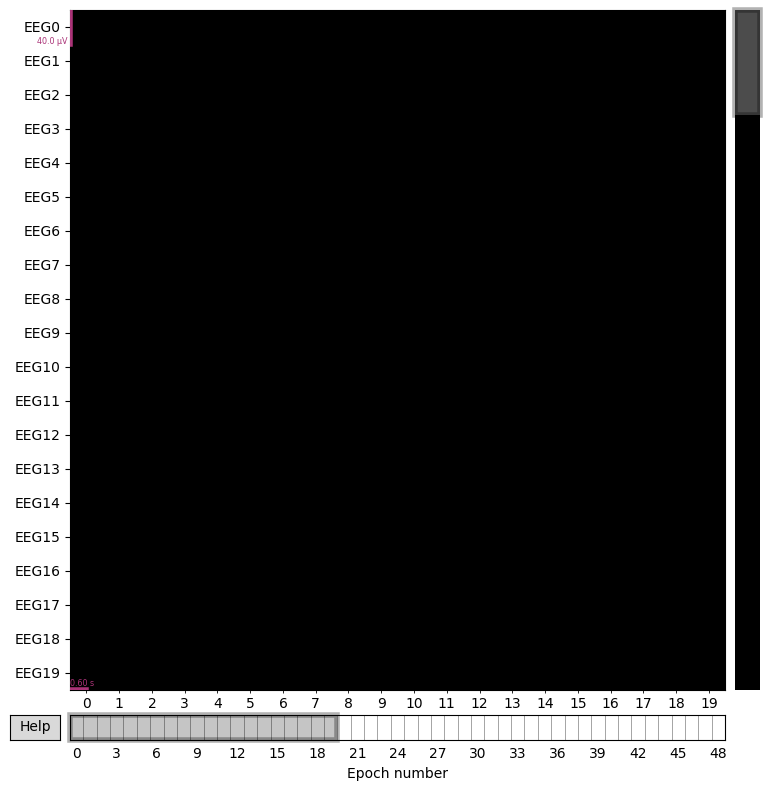

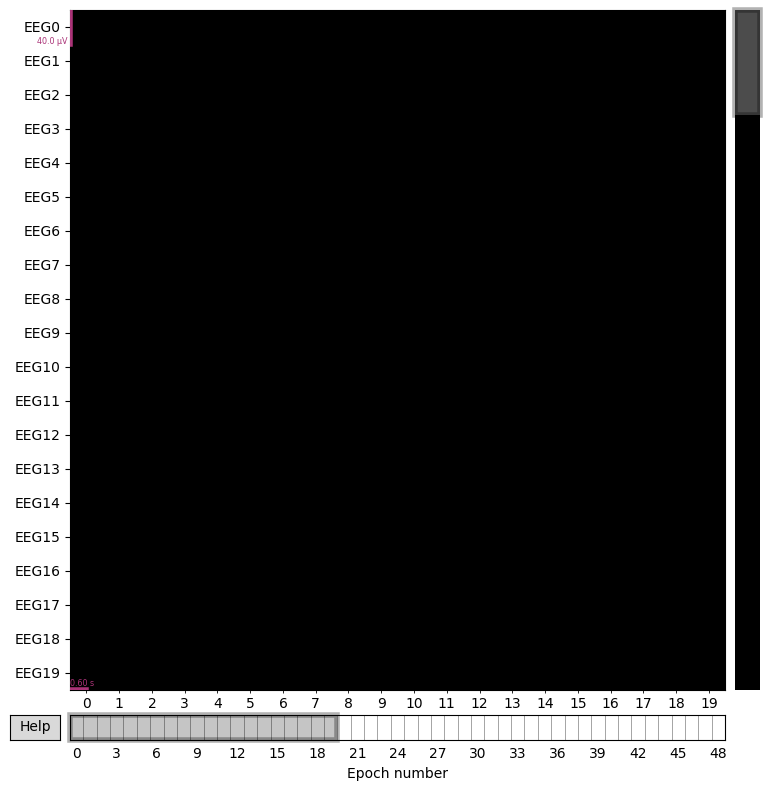

In [ ]:

# Ensure the triggers and onsets are properly extracted as 1D arrays
triggers = [str(trigger[0]) if isinstance(trigger, np.ndarray) else str(trigger) for trigger in DIN_1[0]]  # Flatten and convert to string
onsets = np.array([onset[0] if isinstance(onset, np.ndarray) else onset for onset in DIN_1[1]], dtype=int)  # Flatten onsets to 1D

# Create a dictionary to map string triggers to unique integers
unique_triggers = np.unique(triggers)  # Get unique trigger values (strings)
trigger_map = {trigger: idx for idx, trigger in enumerate(unique_triggers, 1)}  # Map each trigger to a unique integer

# Now map the raw triggers to their integer IDs using the trigger_map
mapped_triggers = [trigger_map[trigger] for trigger in triggers]

# Correct the onsets for downsampling from 1 kHz to 125 Hz
corrected_onsets = onsets // 8  # Adjusting for downsampling

# Create events array with shape (N, 3) where N is the number of events
# First column: Onset times (in samples), Second column: all zeros, Third column: Event IDs (mapped_triggers)
events = np.column_stack((corrected_onsets, np.zeros(len(corrected_onsets), dtype=int), mapped_triggers))

# Now let's visualize and check the shape of the events array
print(events[:5])  # Check the first 5 events
print(f"Trigger Map: {trigger_map}")  # View the mapping from string triggers to integers

# Get the number of channels and time points
n_channels, n_timepoints = eeg_data.shape

# Create a time vector (assuming 125 Hz sampling rate)
fs = 125  # Sampling frequency
time = np.arange(n_timepoints) / fs  # Time in seconds

# Convert the raw data to MNE Raw object for easier preprocessing
info = mne.create_info(ch_names=[f"EEG{i}" for i in range(eeg_data.shape[0])], sfreq=fs, ch_types='eeg')
raw = mne.io.RawArray(eeg_data, info)

# Apply bandpass filter (1 to 50 Hz)
raw_filtered = raw.filter(l_freq=30.0, h_freq=60.0)

# Create the event_id mapping for MNE, translating integer IDs back to their original trigger strings
event_id = {str(trigger): idx for trigger, idx in trigger_map.items()}

# Create epochs using the events array and the event_id mapping
epochs = mne.Epochs(raw_filtered, events=events, tmin=-0.2, tmax=1.0, baseline=(None, 0), event_id=event_id)

# Plot epochs to verify

epochs.plot()



In [ ]:
print(eeg_data.shape)

(129, 157177)


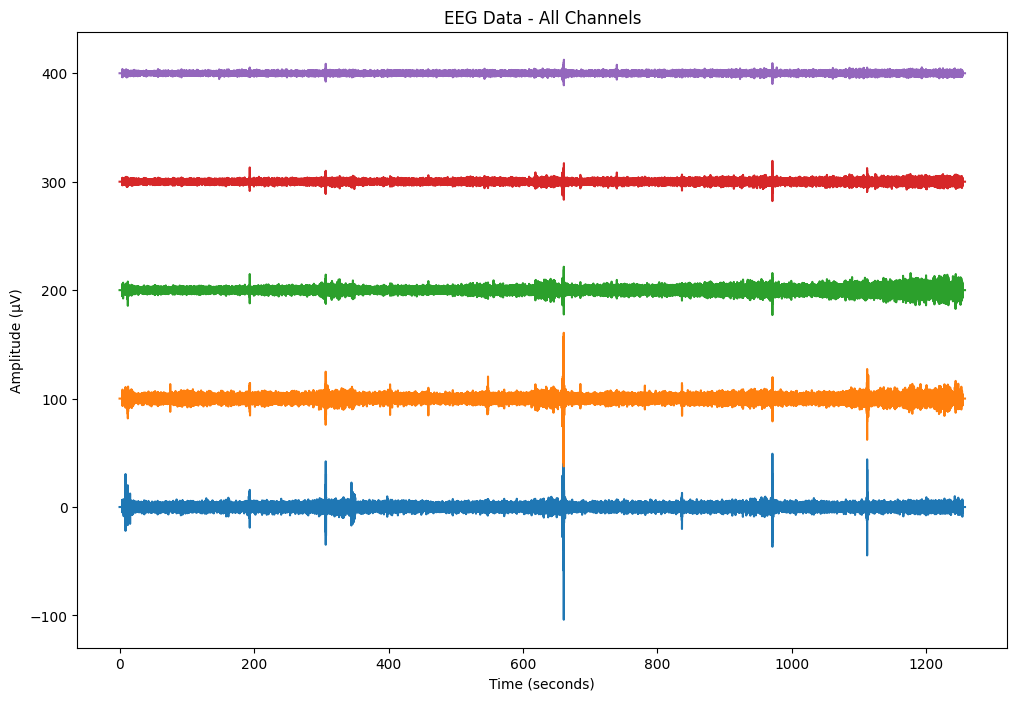

In [ ]:
# Plot all channels on the same graph
plt.figure(figsize=(12, 8))

# Plot each channel with some vertical offset for visualization
for i in range(5):
    plt.plot(time, eeg_data[i, :] + i * 100, label=f'Channel {i+1}')  # Add offset to separate channels visually

# Set plot labels and title
plt.title('EEG Data - All Channels')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (µV)')

# Optionally, add a legend for channels (can be omitted if there are too many channels)
# plt.legend(loc='upper right', ncol=2)

# Show the plot
plt.show()



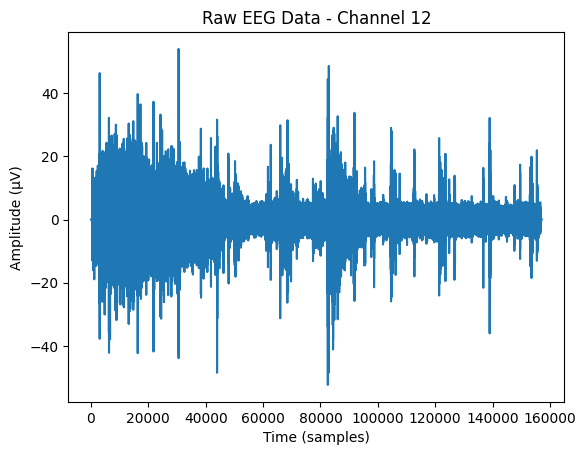

In [ ]:
plt.plot(raw_data['X'][100, :])  # Channel 1, for example
plt.title('Raw EEG Data - Channel 12')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude (µV)')
plt.show()

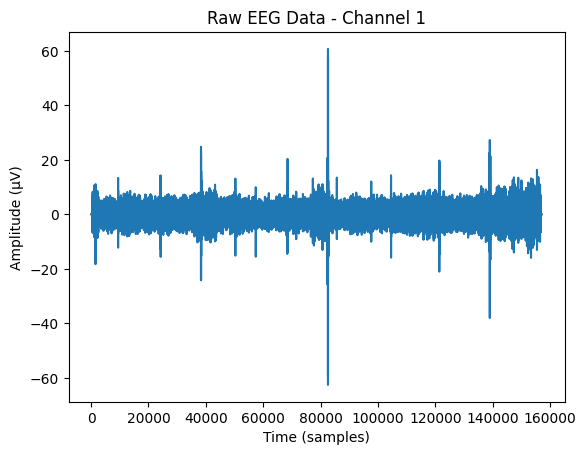

In [ ]:
plt.plot(raw_data['X'][1, :])  # Channel 1, for example
plt.title('Raw EEG Data - Channel 1')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude (µV)')
plt.show()

In [ ]:
# Get power spectral density for each epoch using multitaper method
psd = epochs.compute_psd(method='multitaper', fmin=1, fmax=50)
psds, freqs = psd.get_data(return_freqs=True)

# Compute band power (e.g., delta, theta, alpha, beta, gamma)
band_power = dict(
    delta=(psds[:, :, (freqs >= 1) & (freqs < 4)].mean(axis=2)),
    theta=(psds[:, :, (freqs >= 4) & (freqs < 8)].mean(axis=2)),
    alpha=(psds[:, :, (freqs >= 8) & (freqs < 13)].mean(axis=2)),
    beta=(psds[:, :, (freqs >= 13) & (freqs < 30)].mean(axis=2)),
    gamma=(psds[:, :, (freqs >= 30) & (freqs <= 50)].mean(axis=2))
)

# Convert to a feature matrix (combine the power in each band across channels)
features = np.column_stack([
    band_power['delta'].mean(axis=1),
    band_power['theta'].mean(axis=1),
    band_power['alpha'].mean(axis=1),
    band_power['beta'].mean(axis=1),
    band_power['gamma'].mean(axis=1)
])

#plt.bar(range(len(band_power)), list(band_power.values()), align='center')
#plt.xticks(range(len(band_power)), list(band_power.keys()))

#features.plot.kde();

Using data from preloaded Raw for 49 events and 151 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


<ipython-input-14-552354ac7827>:2: UserWarning: Zero value in spectrum for channel EEG128
  psd = epochs.compute_psd(method='multitaper', fmin=1, fmax=50)


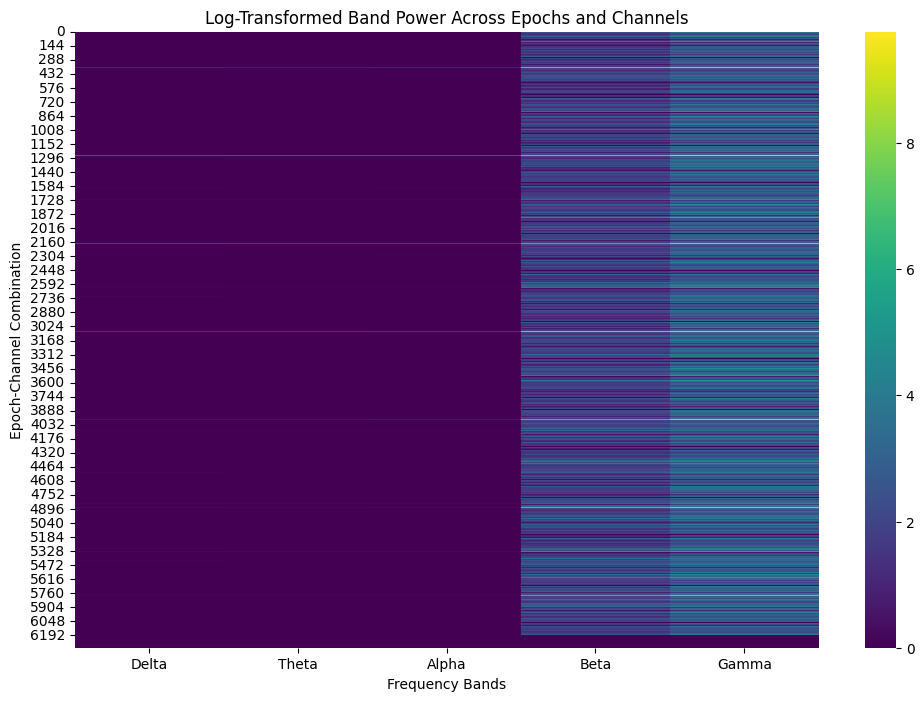

In [ ]:
band_power = dict(
    delta=(psds[:, :, (freqs >= 1) & (freqs < 4)].mean(axis=2)),
    theta=(psds[:, :, (freqs >= 4) & (freqs < 8)].mean(axis=2)),
    alpha=(psds[:, :, (freqs >= 8) & (freqs < 13)].mean(axis=2)),
    beta=(psds[:, :, (freqs >= 13) & (freqs < 30)].mean(axis=2)),
    gamma=(psds[:, :, (freqs >= 30) & (freqs <= 50)].mean(axis=2))
)

# Convert band power to a matrix for visualization (combine epochs and channels)
n_epochs, n_channels = psds.shape[:2]
band_names = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']

# Combine band powers into one matrix for heatmap (rows: epoch-channel, columns: bands)
band_power_matrix = np.column_stack([band_power['delta'].flatten(),
                                     band_power['theta'].flatten(),
                                     band_power['alpha'].flatten(),
                                     band_power['beta'].flatten(),
                                     band_power['gamma'].flatten()])

# Apply log transformation to reduce the effect of large values
band_power_matrix_log = np.log1p(band_power_matrix)  # log1p to handle zero values

# Create a heatmap to visualize the band power across epochs and channels
plt.figure(figsize=(12, 8))
sns.heatmap(band_power_matrix_log, xticklabels=band_names, cmap='viridis', cbar=True)
plt.title('Log-Transformed Band Power Across Epochs and Channels')
plt.ylabel('Epoch-Channel Combination')
plt.xlabel('Frequency Bands')
plt.show()

Creating RawArray with float64 data, n_channels=129, n_times=157177
    Range : 0 ... 157176 =      0.000 ...  1257.408 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 413 samples (3.304 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    2.7s


Not setting metadata
49 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 49 events and 151 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


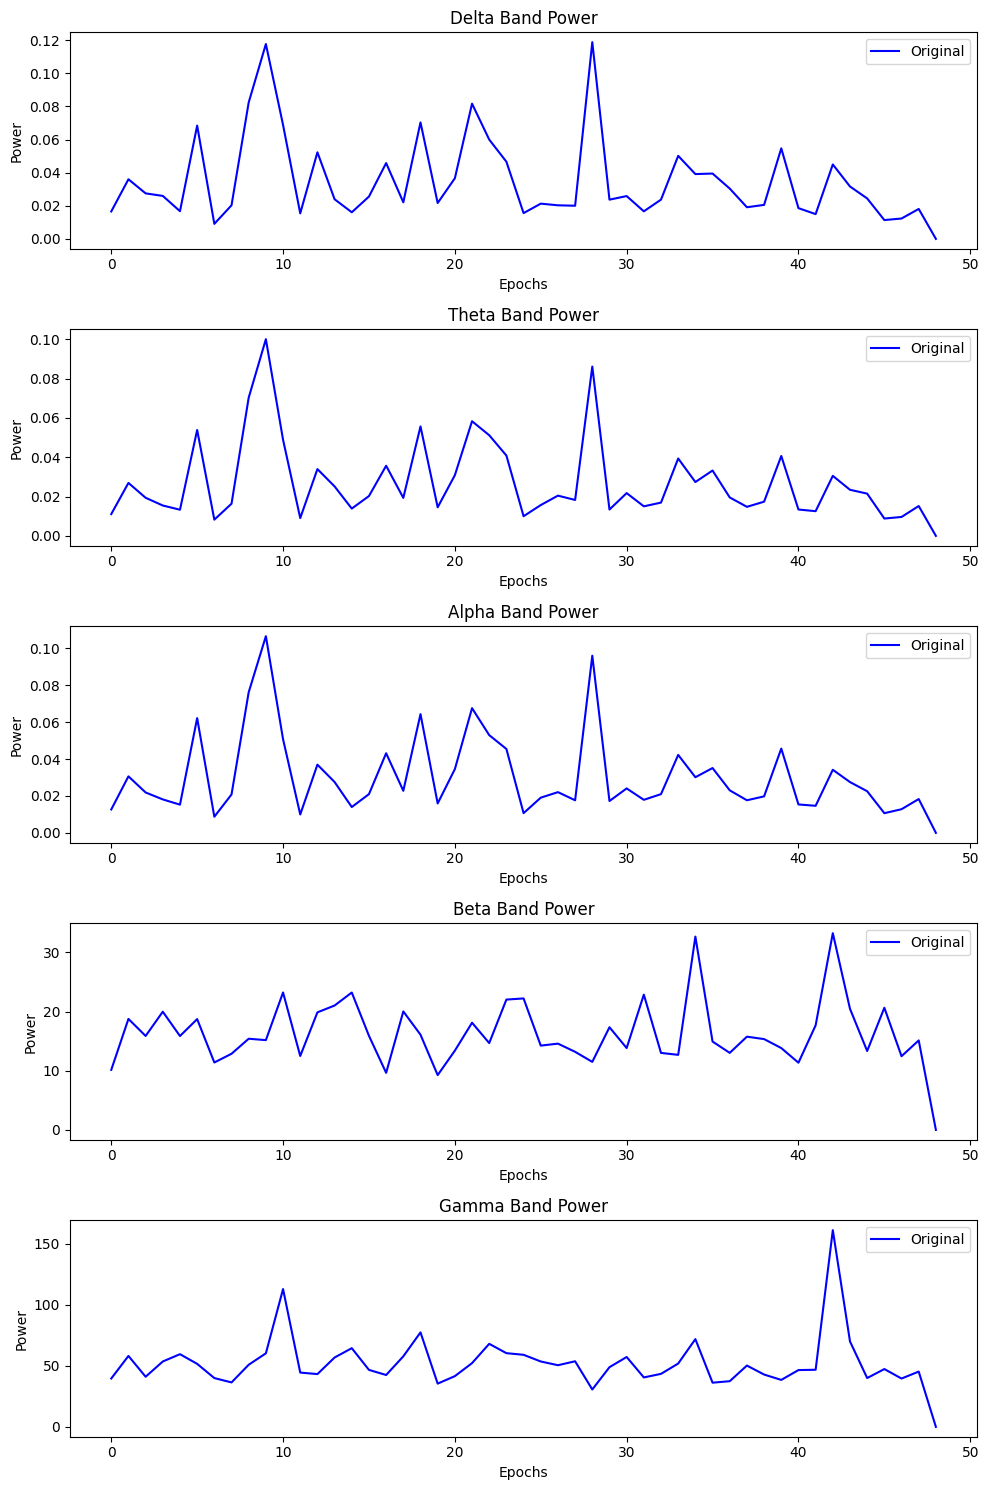

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Original EEG data
original_eeg_data = eeg_data.copy()

# Apply Gaussian noise to each channel with a small standard deviation (noise level)
noise_level = 0.05  # Adjust this value to increase or decrease the noise intensity
noisy_eeg_data = original_eeg_data + noise_level * np.random.normal(size=original_eeg_data.shape)

# Convert the noisy data to an MNE Raw object for processing
raw_noisy = mne.io.RawArray(noisy_eeg_data, info)

# Reapply bandpass filter to noisy data
raw_noisy_filtered = raw_noisy.filter(l_freq=1.0, h_freq=50.0)

# Recreate epochs with noisy data
epochs_noisy = mne.Epochs(raw_noisy_filtered, events=events, tmin=-0.2, tmax=1.0, baseline=(None, 0), event_id=event_id)

# Compute power spectral density (PSD) for each epoch in the noisy data
psd_noisy = epochs_noisy.compute_psd(method='multitaper', fmin=1, fmax=50)
psds_noisy, freqs_noisy = psd_noisy.get_data(return_freqs=True)

# Calculate band power for noisy data
band_power_noisy = dict(
    delta=(psds_noisy[:, :, (freqs_noisy >= 1) & (freqs_noisy < 4)].mean(axis=2)),
    theta=(psds_noisy[:, :, (freqs_noisy >= 4) & (freqs_noisy < 8)].mean(axis=2)),
    alpha=(psds_noisy[:, :, (freqs_noisy >= 8) & (freqs_noisy < 13)].mean(axis=2)),
    beta=(psds_noisy[:, :, (freqs_noisy >= 13) & (freqs_noisy < 30)].mean(axis=2)),
    gamma=(psds_noisy[:, :, (freqs_noisy >= 30) & (freqs_noisy <= 50)].mean(axis=2))
)

# Plot comparison of original and noisy band power
fig, axes = plt.subplots(5, 1, figsize=(10, 15))
bands = ['delta', 'theta', 'alpha', 'beta', 'gamma']
for i, band in enumerate(bands):
    axes[i].plot(band_power[band].mean(axis=1), label='Original', color='blue')
    #axes[i].plot(band_power_noisy[band].mean(axis=1), label='Noisy', color='red', linestyle='dashed')
    axes[i].set_title(f'{band.capitalize()} Band Power')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Power')
    axes[i].legend()

plt.tight_layout()
plt.show()
